# Investigating the Social Nuances of Medical Appointment Attendance in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my second Udacity Data Analyst Nanodegree project, I have chosen to analyze the "No-show appointments" dataset. This dataset is composed of over 100,000 individual medical appointments in Brazil. Originally source from Kaggle, this dataset was designed to answer questions regarding whether or not patients showed up for their apointments. 

In [837]:
# Importing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Loading data and understanding the different datapoints it contains
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Just by running a basic .info command in python, we are able to see that there are 110,527 individual medical appointments contained in the original dataset. Moreover, we are able to see that in addition to the AppointmentID, PatientID, whether or not the appointment was a no-show, appointment day, and the day on which the appointment was scheduled that there are additional interesting pieces of demographic data about the patient--including age, gender neighborhood, presence of certain medical issues, and whether or not the patient received an SMS message for that appointment.

### Project Research Questions
Knowing that this information is available, I will attempt to answer the following questions:

1. What patient demographic facts might be important for predicting whether or not a patient will attend his or her appointment: e.g. do age or gender play a factor in whether or not a person is more likely to have a no-show for their appointment, is the neighborhood a person lives in correlated with the potential for a person to no-show for their appointment, are welfare program recipients more likely to attend their appointments, and are patients with known chronic medical problems more likely to attend their appointments?

2. Is the likelihood for an appointment no-show correlated with the length of time since the appointment was made? For example, are same-day appointments more likely to attend their appointment? Are patients who receive SMS reminders (and have not been scheduled the same day as their appointments) more likely to attend their appointments. Moreover, what are the characteristics of patients who are making same-day appointments?


<a id='wrangling'></a>
## Data Wrangling

### General Properties
As shown in the Introduction, there are over 100,000 individual rows of data in this dataset.

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [839]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that across 14 different columns there is a variety of datatypes, including floats, integers, and strings. There are several different opportunities for data cleaning based off of this information alone:

- PatientId should be renamed to PatientID to make it consistent with AppointmentID.
- Handcap should be renamed to Handicap.
- Hipertension should be renamed to Hypertension.
- Both the ScheduledDay and AppointmentDay columns are string objects. These columns will need to be converted to datetime for ease in the analysis stage of this project. - PatientID is a float, rather than an integer. In order to make the PatientId comparable to the AppointmentID, we will need to convert this column to the integer type.
- No-show needs two different treatments: first, it needs to be converted to an integer binary like all of the other categorical variables; and secondly, it should be renamed into camel-case like the other headings.

Before performing any checks, let's go ahead and rename the columns.

In [840]:
#Renaming No-show column for consistency
df.rename(columns={'No-show':'No_show', 'PatientId':'PatientID', 'Handcap':'Handicap', 'Hipertension': 'Hypertension'}, inplace=True)
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [841]:
df.duplicated().sum()

0

Fortunately, there are no duplicate entries in this dataset. Having performed that check, I then looked for outliers in the data.

In [842]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())#Hypertension
print('Handicap:',df.Handicap.unique())#Handicap
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


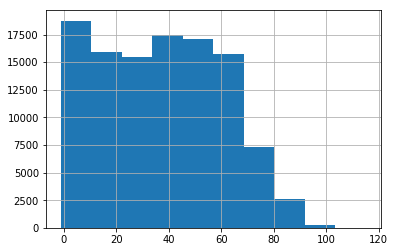

In [843]:
df.Age.hist()

It appears as though there is definitely an outlier at the minimum threshold for Age in the dataset, but the same cannot be said for the maximum--as there have been multiple documented instances of people living beyond the age of 100 (beyond 115 even). Thus, I have made the decision only to remove all appointment entries with patients having an age of less than 0. 

### Data Cleaning
#### Data Type Transformations

The first data cleaning tasks I needed to perform were to transform the ScheduledDay and AppointmentDay columns into the datetime format.

In [844]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Converting ScheduledDay and AppointmentDay to datetime and normalizing it to just display year-month-day

df.AppointmentDay = df.AppointmentDay.apply(np.datetime64).dt.normalize()
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64).dt.normalize()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [845]:
#Make PatientID Integer
df['PatientID'] = df['PatientID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


#### Converting Strings to Integers in the NoShow column

In [846]:
#Convert NoShow to Binary like all others
print('Confirming NoShow Value Counts Before Replace:')
print(df.No_show.value_counts())
df.No_show.replace(to_replace='No', value='0', inplace=True)
df.No_show.replace(to_replace='Yes', value='1', inplace=True)
print('Confirming NoShow Value Counts After Replace:')
print(df.No_show.value_counts())

Confirming NoShow Value Counts Before Replace:
No     88208
Yes    22319
Name: No_show, dtype: int64
Confirming NoShow Value Counts After Replace:
0    88208
1    22319
Name: No_show, dtype: int64


In [847]:
#Make NowShow Integer like other Binaries
df['No_show'] = df['No_show'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


#### Removing Outliers

In [848]:
#Drop Outlier datapoint of -1 age.
print('Confirming outlier present.')
print(df.Age.describe())

df = df[(df.Age >= 0) & (df.Age <= 95)]

print('Confirming outlier removed.')
print(df.Age.describe())

Confirming outlier present.
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64
Confirming outlier removed.
count    110480.000000
mean         37.063342
std          23.079712
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          95.000000
Name: Age, dtype: float64


In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110480 non-null int64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 12.6+ MB


Creating Additional Columns for Analysis
Date of the Week Scheduled

In [850]:
df['ScheduleAdvance'] = df["AppointmentDay"].sub(df["ScheduledDay"], axis=0)
df.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2 days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2 days
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0 days
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2 days


In [851]:
df['WeekDayScheduled'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
df.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,5
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,5
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,5
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,5
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,5


In [852]:
df['Num_App_Missed'] = df.groupby('PatientID')['No_show'].apply(lambda x: x.cumsum())
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled,Num_App_Missed
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,5,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,5,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,5,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,5,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,5,0


In [853]:
df['SameDay'] = np.where(df['ScheduledDay']==df['AppointmentDay'], '1', '0').astype(int)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled,Num_App_Missed,SameDay
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,5,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,5,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,5,0,1
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,5,0,1
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,5,0,1


In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 18 columns):
PatientID           110480 non-null int64
AppointmentID       110480 non-null int64
Gender              110480 non-null object
ScheduledDay        110480 non-null datetime64[ns]
AppointmentDay      110480 non-null datetime64[ns]
Age                 110480 non-null int64
Neighbourhood       110480 non-null object
Scholarship         110480 non-null int64
Hypertension        110480 non-null int64
Diabetes            110480 non-null int64
Alcoholism          110480 non-null int64
Handicap            110480 non-null int64
SMS_received        110480 non-null int64
No_show             110480 non-null int64
ScheduleAdvance     110480 non-null timedelta64[ns]
WeekDayScheduled    110480 non-null int64
Num_App_Missed      110480 non-null int64
SameDay             110480 non-null int64
dtypes: datetime64[ns](2), int64(13), object(2), timedelta64[ns](1)
memory usage: 16.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  Are same-day appointments more likely to attend their appointments? 

Relationship between scheduling behaviors/practices and no show appointments.

Regarding same-day appointments, I would also like to investigate the following questions:

- What are the characteristics of patients who are making same-day appointments?

First, let's look at the general shape and nature of the dataset.

In [855]:
df.shape

(110480, 18)

In [856]:
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled,Num_App_Missed,SameDay
count,1.104800e+05,1.104800e+05,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480,110480.000000,110480.000000,110480.000000
mean,1.474691e+14,5.675303e+06,37.063342,0.098307,0.197076,0.071841,0.030413,0.022167,0.321126,0.201955,10 days 04:24:21.375814,2.858137,0.412518,0.348850
std,2.560626e+14,7.128285e+04,23.079712,0.297731,0.397792,0.258226,0.171721,0.161252,0.466911,0.401461,15 days 06:03:48.907110,1.371623,0.803657,0.476609
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00,1.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,2.000000,0.000000,0.000000
50%,3.172598e+13,5.680564e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00,3.000000,0.000000,0.000000
75%,9.438179e+13,5.725507e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15 days 00:00:00,4.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,95.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179 days 00:00:00,6.000000,18.000000,1.000000


In [857]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Subset of only NoShows
df_attend = df.query('No_show == 0')
df_attend.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled,Num_App_Missed,SameDay
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,5,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,5,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,5,0,1
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,5,0,1
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,5,0,1


In [858]:
df_noshow = df.query('No_show == 1')
noshow = df["No_show"].value_counts()
pct_noshow = noshow[1]/ noshow.sum() * 100
print('{0:.2f}% of patients miss their scheduled appointments.'.format(pct_noshow))

20.20% of patients miss their scheduled appointments.


In [859]:
sameday = df['SameDay'].value_counts()
pct_sameday = sameday[1]/ sameday.sum() * 100
print('{0:.2f}% of patients make their appointment for the same day they call.'.format(pct_sameday))

34.89% of patients make their appointment for the same day they call.


In [860]:
sameday_attend = df_attend['SameDay'].value_counts()

pct_attend_sameday = (sameday_attend[1] / sameday[1])*100
print('{0:.2f}% of patients who attend their appointments schedule them the same day.'.format(pct_attend_sameday))


95.36% of patients who attend their appointments schedule them the same day.


In [861]:
sameday_noshow = df_noshow['SameDay'].value_counts()

pct_sameday_noshow = (sameday_noshow[1] / sameday[1]) * 100
print('{0:.2f}% of same-day patients do not attend their appointment.'.format(pct_sameday_noshow))

pct_noshow_sameday = (sameday_noshow[1] / noshow.sum()) * 100
print('{0:.2f}% of no-show appointments try to schedule their appointment for the same day.'.format(pct_noshow_sameday))

4.64% of same-day patients do not attend their appointment.
1.62% of no-show appointments try to schedule their appointment for the same day.


You can pretty much guarantee that a Same Day appointment will attend. People with chronic no-shows should be encouraged to make their appointments for the same day, if possible.

What are the characteristics of Same Day patients?

In [862]:
df_sameday = df.query('SameDay == 1')
df_sameday.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleAdvance,WeekDayScheduled,Num_App_Missed,SameDay
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,5,0,1
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days,5,0,1
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days,5,0,1
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days,5,0,1
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days,5,0,1


In [863]:
sameday_gender = df_sameday['Gender'].value_counts()
print(sameday_gender)
pct_sameday_gender = sameday_gender['F'] / sameday_gender.sum() * 100
print(pct_sameday_gender)

F    23748
M    14793
Name: Gender, dtype: int64
61.617498248618354


count    38541.000000
mean        34.417867
std         23.180854
min          0.000000
25%         15.000000
50%         34.000000
75%         52.000000
max         95.000000
Name: Age, dtype: float64


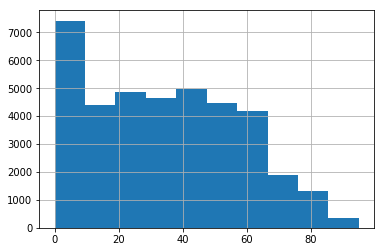

In [864]:
print(df_sameday['Age'].describe())
df_sameday['Age'].hist();

In [865]:
sameday_schol = df_sameday['Scholarship'].value_counts()
print(sameday_schol)


0    34351
1     4190
Name: Scholarship, dtype: int64


In [866]:
sameday_hyper = df_sameday['Hypertension'].value_counts()
print(sameday_hyper)
pct_sameday_hyper = (sameday_hyper[1] / sameday_hyper.sum()) * 100
print('{0:.2f}% of same-day patients have Hypertension.'.format(pct_sameday_hyper))

0    31787
1     6754
Name: Hypertension, dtype: int64
17.52% of same-day patients have Hypertension.


In [867]:
sameday_diabetes = df_sameday['Diabetes'].value_counts()
print(sameday_diabetes)
pct_sameday_diabetes = (sameday_diabetes[1] / sameday_diabetes.sum()) * 100
print('{0:.2f}% of same-day patients have Diabetes.'.format(pct_sameday_diabetes))

0    35980
1     2561
Name: Diabetes, dtype: int64
6.64% of same-day patients have Diabetes.


In [868]:
sameday_alc = df_sameday['Alcoholism'].value_counts()
print(sameday_alc)
pct_sameday_alc = (sameday_alc[1] / sameday_alc.sum()) * 100
print('{0:.2f}% of same-day patients have Alcoholism.'.format(pct_sameday_alc))

0    37003
1     1538
Name: Alcoholism, dtype: int64
3.99% of same-day patients have Alcoholism.


In [869]:
sameday_handi = df_sameday['Handicap'].value_counts()
print(sameday_handi)
pct_sameday_handi = (sameday_handi[1] / sameday_handi.sum()) * 100
print('{0:.2f}% of same-day patients present one or more handicaps.'.format(pct_sameday_handi))

0    37612
1      852
2       71
3        5
4        1
Name: Handicap, dtype: int64
2.21% of same-day patients present one or more handicaps.


In [870]:
print(df_sameday['Num_App_Missed'].value_counts())
print(df_sameday['Num_App_Missed'].describe())

0     32015
1      4717
2      1051
3       362
4       161
5        72
6        48
8        26
7        21
9        15
12       14
11       12
10       11
13        5
14        4
15        3
16        2
17        1
18        1
Name: Num_App_Missed, dtype: int64
count    38541.000000
mean         0.268026
std          0.843475
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: Num_App_Missed, dtype: float64


Most individuals who make same-day appointments do not no-show. Moreover, they tend to not have chronic health issues, and are most often not a part of the Brazilian welfare program.

In [871]:
#Found this code at https://github.com/abodacs/DAND_Project2_Investigate-a-Dataset and applied it to my analysis.
def prob_same(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['SameDay']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probSameDay'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probSameDay']] 


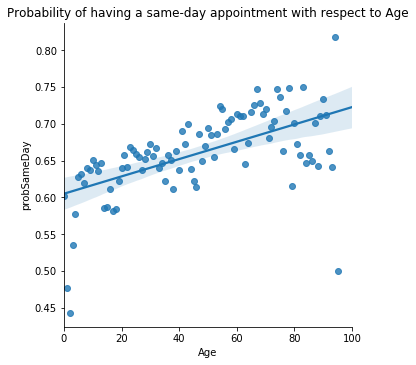

In [872]:
sns.lmplot(data = prob_same(df, 'Age'), x = 'Age', y = 'probSameDay', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of having a same-day appointment with respect to Age')
plt.show()

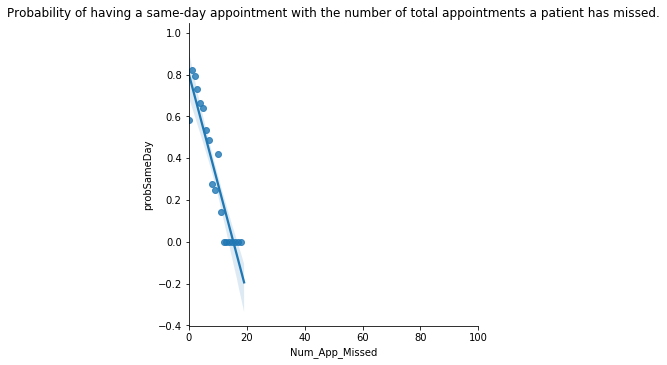

In [873]:
sns.lmplot(data = prob_same(df, 'Num_App_Missed'), x = 'Num_App_Missed', y = 'probSameDay', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of having a same-day appointment with the number of total appointments a patient has missed.')
plt.show()

In [874]:
def prob_categorical_same(df, group_by):
    rows = []
    for item in group_by:
        #np.array((df[item] == level) & (df['SameDay'] == 0), dtype = bool)
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            #n = len(df[(df[item] == level) & (df['SameDay'] == 0)])
            n = len(np.array(df[(df[item] == level) & (df['SameDay'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

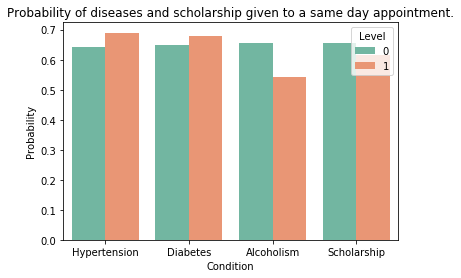

In [875]:
sns.barplot(data = prob_categorical_same(df,['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of diseases and scholarship given to a same day appointment.')
plt.ylabel('Probability')
plt.show();

### Research Question #2: Are patients who receive SMS reminders (and have not been scheduled the same day as their appointments) more likely to attend their appointments. 


#### SMS Received

In [876]:
df.groupby('SMS_received')['No_show'].mean()

SMS_received
0    0.167036
1    0.275777
Name: No_show, dtype: float64

In [877]:
sms = df['SMS_received'].value_counts()
pct_sms = (sms[1] / sms.sum()) * 100
print('{0:.2f}% of appointments involved the patient receiving an SMS reminder.'.format(pct_sms))

32.11% of appointments involved the patient receiving an SMS reminder.


In [878]:
sms_noshow = df_noshow['SMS_received'].value_counts()
pct_sms_noshow = (sms_noshow[1] / sms.sum()) * 100
print('{0:.2f}% of appointments having received SMS reminders were attended. '.format(100-pct_sms_noshow))
pct_nosms_noshow = (sms_noshow[0] / noshow[1])*100
print('{0:.2f}% of no-show appointments involved a patient not receiving an SMS message.'.format(pct_nosms_noshow))

91.14% of appointments having received SMS reminders were attended. 
56.15% of no-show appointments involved a patient not receiving an SMS message.



### Research Question 3: What patient demographic factors might be important for predicting whether or not a patient will attend his or her appointment?

We can subdivide this question further into the following questions:
1. Does Age play a factor in whether or not a person is more likely to have a no-show for their appointment?
2. Does Gender play a factor in whether or not a person is more likely to have a no-show for their appointment?
3. Are patients who receive welfare program benefits more likely to attend their appointments? 
5. Are patients with known chronic medical problems more likely to attend their appointments?




In [879]:
print("Remember, {0:.2f}% of patients miss their scheduled appointments.".format(pct_no_show))

Remember, 20.19% of patients miss their scheduled appointments.


In [880]:
df.describe().Age

count    110480.000000
mean         37.063342
std          23.079712
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          95.000000
Name: Age, dtype: float64

In [881]:
#Found this code at https://github.com/abodacs/DAND_Project2_Investigate-a-Dataset and applied it to my analysis.
def prob_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']] 



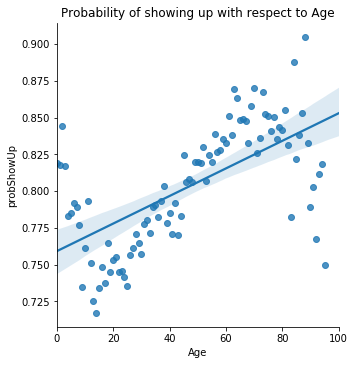

In [882]:
sns.lmplot(data = prob_show(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

### Number of Missed Appointments and No-Show

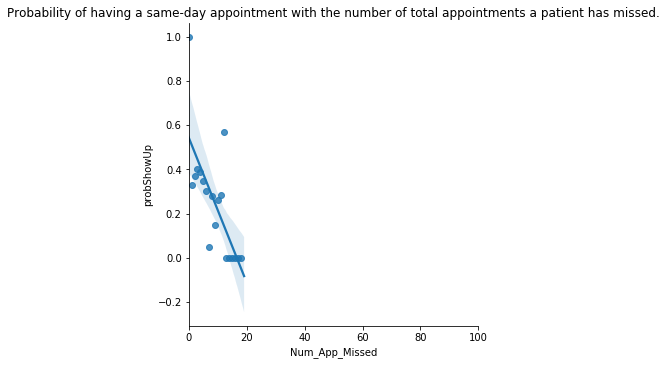

In [883]:
sns.lmplot(data = prob_show(df, 'Num_App_Missed'), x = 'Num_App_Missed', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of having a same-day appointment with the number of total appointments a patient has missed.')
plt.show()

No-show rate of medical appointments is highly dependent on the age of the patient. It appears as though patients younger than 24 years old have higher no-show rates, where as patients 80 years of age and older have lower rates of failing to attend their appointments. Moreover the fewer appointments the patient has missed, the less likely that patient will not be a no-show.

#### Investigating Gender, Chronic Disease, ad Welfare Program Status with Appointment Attendance



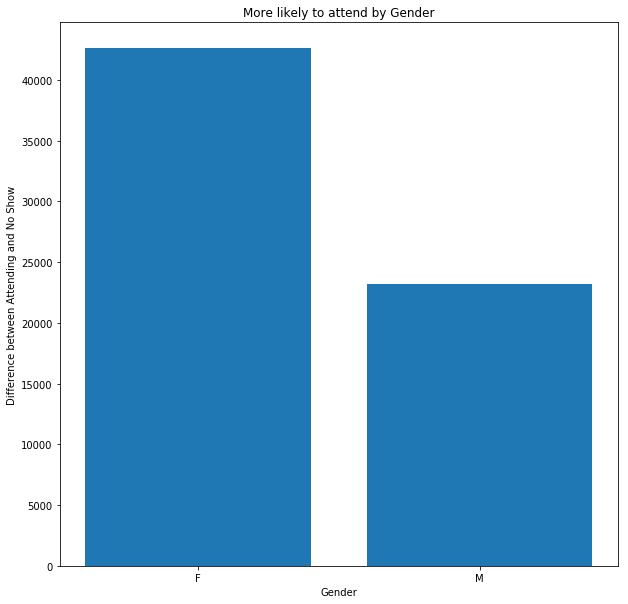

In [884]:
df_attend_gender = df_attend["Gender"].value_counts()
df_noshow_gender = df_noshow["Gender"].value_counts()

diff_gender = df_attend_gender - df_noshow_gender

plt.subplots(figsize=(10, 10))
plt.bar(diff_gender.index, diff_gender)
plt.title('More likely to attend by Gender')
plt.xlabel('Gender')
plt.ylabel('Difference between Attending and No Show');

In [885]:
columns = ['Gender','Hypertension','Alcoholism','Diabetes', 'Scholarship']
for r in columns :
    print(df.groupby(r)['No_show'].mean())

Gender
F    0.20317
M    0.19970
Name: No_show, dtype: float64
Hypertension
0    0.209048
1    0.173058
Name: No_show, dtype: float64
Alcoholism
0    0.201970
1    0.201488
Name: No_show, dtype: float64
Diabetes
0    0.203641
1    0.180169
Name: No_show, dtype: float64
Scholarship
0    0.198095
1    0.237363
Name: No_show, dtype: float64


In [886]:
def prob_categorical_noshow(df, group_by):
    rows = []
    for item in group_by:
        #np.array((df[item] == level) & (df['No_show'] == 0), dtype = bool)
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            #n = len(df[(df[item] == level) & (df['No_show'] == 0)])
            n = len(np.array(df[(df[item] == level) & (df['No_show'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

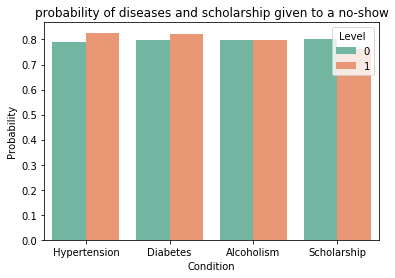

In [887]:
sns.barplot(data = prob_categorical_noshow(df,['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('probability of diseases and scholarship given to a no-show')
plt.ylabel('Probability')
plt.show()

<a id='conclusions'></a>
## Conclusions

There are several conclusions that can be made from this dataset.

First of all, we have learned that individuals who schedule same day appointments are extremely unlikely to be no-shows (less than 5% of patients no-show on a same-day appointment)--despite the fact that less than 35% of patients make same-day appointments. Approximately 60% of same-day patients are female, and distribution of ages is skewed right with a mean age of approximately 34 years old. Most people with same-day appointments have never missed an appointment. Moreover, they tend to not have chronic illnesses and are most likely not participating in the welfare program. Regarding chronic illnesses, however, there is a sightly higher probability that patients with hypertension or diabetes will make same-day appointments, whereas there is a lower probability that a patient diagnosed with alcoholism will make a same-day appointment.

Some of the more interesting findings from this analysis were regarding SMS reminders. Although there was no correlation between no-show status and whether or not an SMS reminder was sent for any given appointment, there were some interesting findings related to when an SMS message was sent. Only 32% of patient appointments were sent an SMS reminder. Of those SMS reminders, more than 90% of them were tied to appointments where the patient actually attended. Moreover, over 50% of no-show appointments did not receive an SMS reminder.

Regarding the demographic characteristics of patients who have no-show appointments, I found that the no-show rate decreases for patients over 80 years of age and increases for patients younger than 24 years old. The number of appointments a patient has missed is a fairly good predictor of whether or not he or she will be a no-show. Women are more likely to have no-show appointments than men. Chronic illnessesare not good predictors of no-show status, and welfare recipients are more likely to miss their appointments. 